In [1]:
import psycopg2
import config as creds
import sqlalchemy
from sqlalchemy import create_engine
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user=creds.PGUSER
password=creds.PGPASSWORD
host=creds.PGHOST
port=5432
database=creds.PGDATABASE

In [3]:
engine_str=f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

In [4]:
engine = create_engine(engine_str)

In [5]:
#conn = engine.connect()
conn = engine.raw_connection()
print('Connected')

Connected


In [6]:
cur = conn.cursor()
print('Cursor created')

Cursor created


In [7]:
query1='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.PID = 'PM9961605'
AND b.REPORTINGYEAR = 2019; 
'''

In [8]:
df1=pd.read_sql(query1,conn)

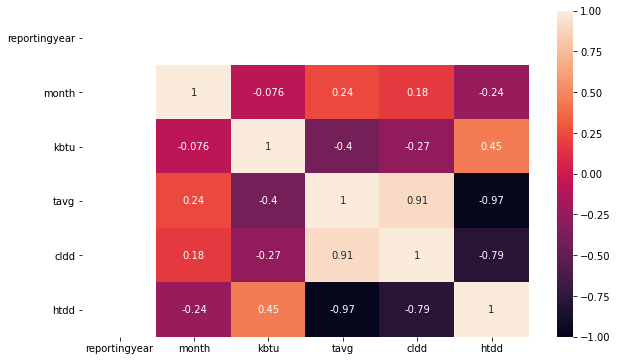

In [9]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True);

<AxesSubplot:xlabel='kbtu', ylabel='cldd'>

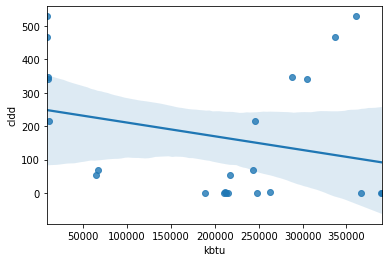

In [10]:
sns.regplot(x='kbtu',y='cldd',data=df1)

In [11]:
line1= stats.linregress(x=df1['kbtu'], y=df1['cldd'])
print(line1)

LinregressResult(slope=-0.0004102301440055627, intercept=251.70129992299064, rvalue=-0.2719000214492127, pvalue=0.19868694442926577, stderr=0.00030954869943410757)


<AxesSubplot:xlabel='kbtu', ylabel='htdd'>

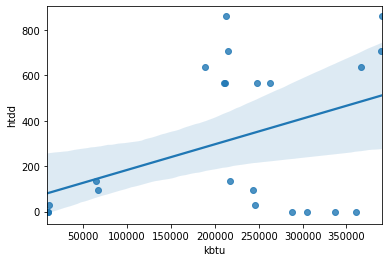

In [12]:
sns.regplot(x='kbtu',y='htdd',data=df1)

In [13]:
line2= stats.linregress(x=df1['kbtu'], y=df1['htdd'])
print(line2)

LinregressResult(slope=0.0011303688745926174, intercept=70.26331175815966, rvalue=0.4497731873497091, pvalue=0.02744153215723497, stderr=0.00047855977854157527)


<AxesSubplot:xlabel='kbtu', ylabel='tavg'>

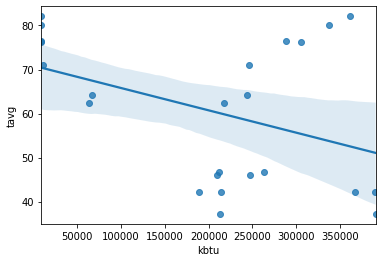

In [14]:
sns.regplot(x='kbtu',y='tavg',data=df1)

In [15]:
line3= stats.linregress(x=df1['kbtu'], y=df1['tavg'])
print(line3)

LinregressResult(slope=-5.079343441517308e-05, intercept=70.88704707628573, rvalue=-0.4046775522399289, pvalue=0.049819550878314606, stderr=2.4470991963372986e-05)


In [16]:
query2='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.PID = 'PM9961605'
AND b.REPORTINGYEAR = 2018; 
'''

In [17]:
df2=pd.read_sql(query2,conn)

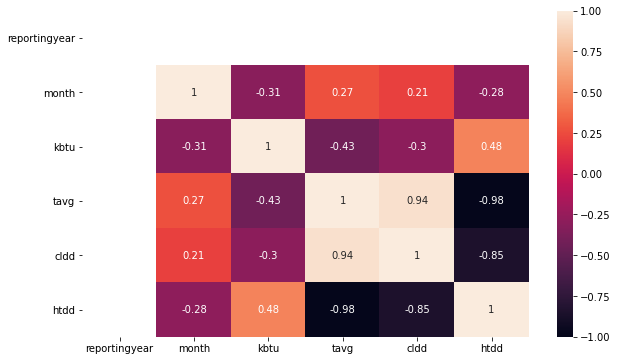

In [18]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df2.corr(),vmin=-1,vmax=1,annot=True);

<AxesSubplot:xlabel='kbtu', ylabel='cldd'>

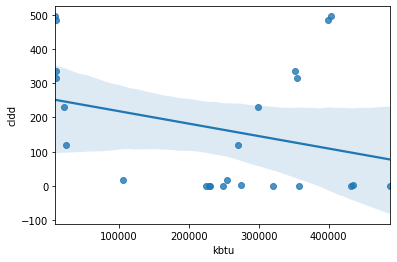

In [19]:
sns.regplot(x='kbtu',y='cldd',data=df2)

In [20]:
line4= stats.linregress(x=df2['kbtu'], y=df2['cldd'])
print(line4)

LinregressResult(slope=-0.00036488776352964976, intercept=255.0082702032954, rvalue=-0.29621631588790487, pvalue=0.1598831205161627, stderr=0.00025084030606148925)


<AxesSubplot:xlabel='kbtu', ylabel='htdd'>

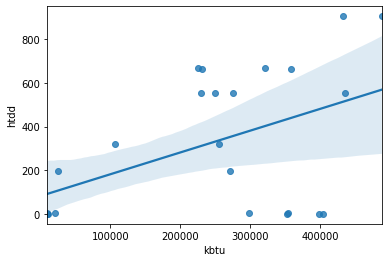

In [21]:
sns.regplot(x='kbtu',y='htdd',data=df2)

In [22]:
line5= stats.linregress(x=df2['kbtu'], y=df2['htdd'])
print(line5)

LinregressResult(slope=0.0010003242994298931, intercept=81.72621926179394, rvalue=0.48157397048524087, pvalue=0.01718614757921469, stderr=0.0003881249328776515)


<AxesSubplot:xlabel='kbtu', ylabel='tavg'>

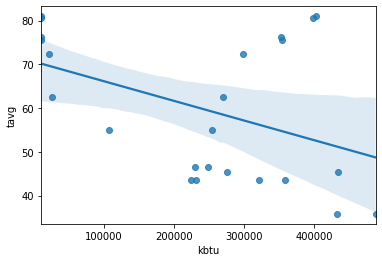

In [23]:
sns.regplot(x='kbtu',y='tavg',data=df2)

In [24]:
line6= stats.linregress(x=df2['kbtu'], y=df2['tavg'])
print(line6)

LinregressResult(slope=-4.491039160179984e-05, intercept=70.62436592484725, rvalue=-0.4292715931176669, pvalue=0.03632118343159535, stderr=2.0145380614352648e-05)


In [25]:
query3='''
SELECT PRIMARYPROPERTYTYPE_SELFSELECT AS self, AVG(KBTU/TAXRECORDFLOORAREA) AS kbtusqft
FROM buildings_data
WHERE ELEGAS = 'E'
AND REPORTINGYEAR = 2019
AND MONTH = 12
AND TAXRECORDFLOORAREA > 0
GROUP BY PRIMARYPROPERTYTYPE_SELFSELECT, MONTH
ORDER BY PRIMARYPROPERTYTYPE_SELFSELECT;

'''

In [26]:
df3=pd.read_sql(query3,conn)

In [27]:
df3.columns

Index(['self', 'kbtusqft'], dtype='object')

In [28]:
df3.head()

,self,kbtusqft
0,0,0.000000
1,10,4.353707
2,11,2.865692
3,13,6.893443
4,14,2.919959


In [29]:
query4='''
SELECT *
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.REPORTINGYEAR = 2018; 
'''

In [30]:
df4=pd.read_sql(query4,conn)

In [31]:
df4.columns

Index(['id', 'pid', 'dcrealpropertyid', 'ward', 'postalcode', 'yearbuilt',
       'reportingyear', 'reportstatus', 'primarypropertytype_selfselect',
       'taxrecordfloorarea', 'reportedbuildinggrossfloorarea',
       'energystarscore', 'month', 'kbtu', 'elegas', 'id', 'date', 'awnd',
       'cldd', 'htdd', 'snow', 'tavg', 'tmax', 'tmin', 'wdf2', 'wdf5', 'wsf2',
       'wsf5', 'weatheryear', 'month'],
      dtype='object')

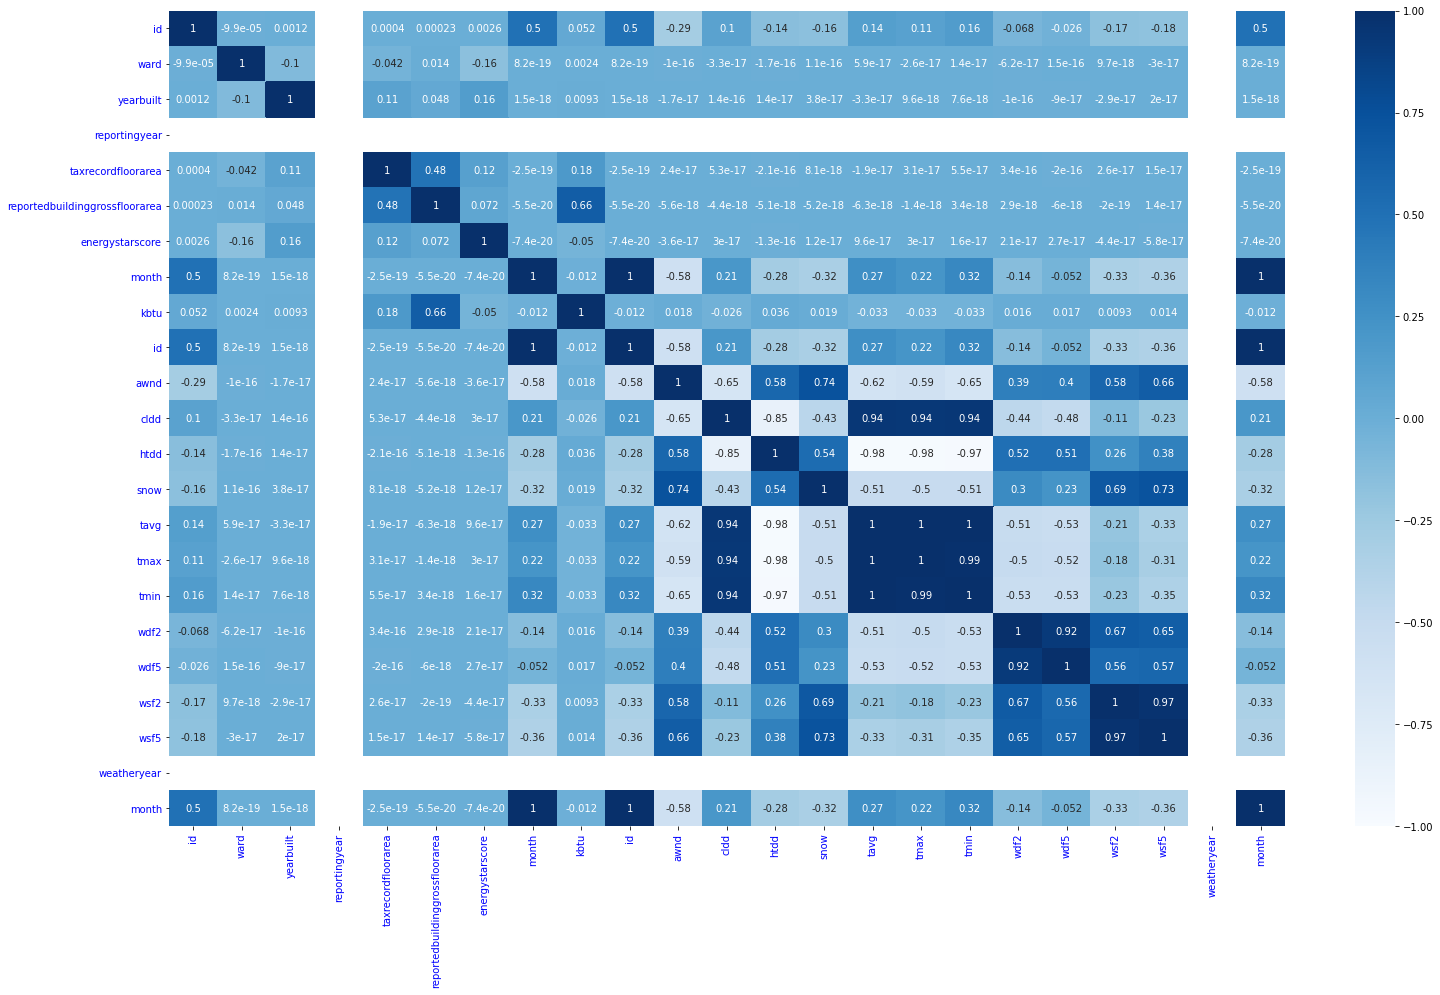

In [32]:
plt.figure(figsize=(25, 15))
heatmap = sns.heatmap(df4.corr(),vmin=-1,vmax=1,annot=True, cmap="Blues");
plt.yticks(color='blue')
plt.xticks(color='blue')
plt.show()

In [33]:
query5='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, AVG(b.KBTU/b.TAXRECORDFLOORAREA) as kbtusqft, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.PID = 'PM9961605'
AND b.REPORTINGYEAR = 2018
AND b.ELEGAS = 'E'
AND b.TAXRECORDFLOORAREA > 0 
GROUP BY b.PID,b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD; 
'''

In [34]:
df5=pd.read_sql(query5,conn)

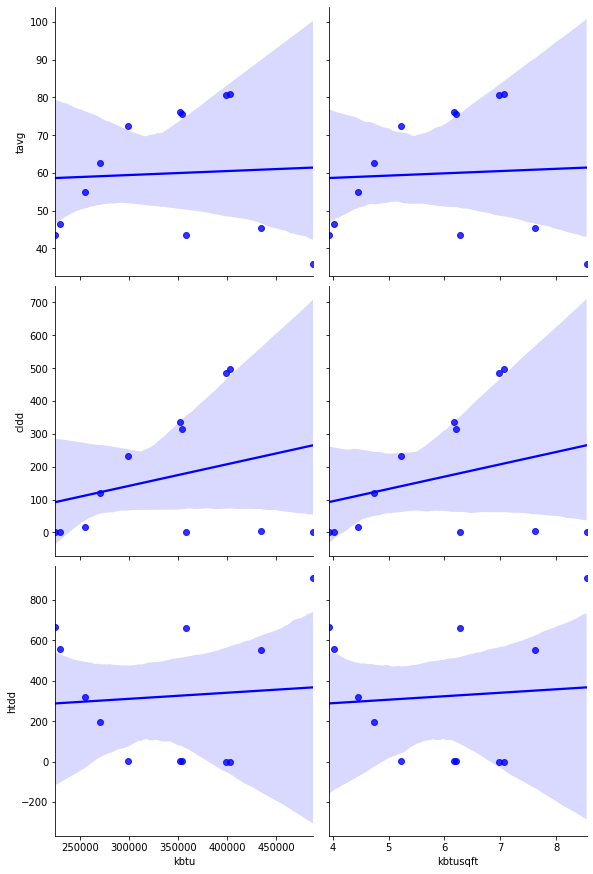

In [35]:
df5reg = sns.PairGrid(df5, y_vars=['tavg', 'cldd', 'htdd'], x_vars=['kbtu','kbtusqft'], height = 4)
df5reg.map(sns.regplot, color='blue')


In [36]:
query6='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, AVG(b.KBTU/b.TAXRECORDFLOORAREA) as kbtusqft, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.PID = 'PM9961605'
AND b.REPORTINGYEAR = 2018
AND b.ELEGAS = 'N'
AND b.TAXRECORDFLOORAREA > 0 
GROUP BY b.PID,b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD;
'''

In [37]:
df6=pd.read_sql(query6,conn)

In [38]:
df6.head()

,pid,reportingyear,month,elegas,kbtu,kbtusqft,tavg,cldd,htdd
0,PM9961605,2018,1,N,432175.5,7.571002,35.8,0.0,906.0
1,PM9961605,2018,2,N,274815.8,4.814319,45.3,4.0,554.0
2,PM9961605,2018,3,N,230806.2,4.043344,43.6,0.0,663.0
3,PM9961605,2018,4,N,106699.3,1.869196,54.9,17.0,319.0
4,PM9961605,2018,5,N,21343.3,0.373899,72.4,232.0,2.0


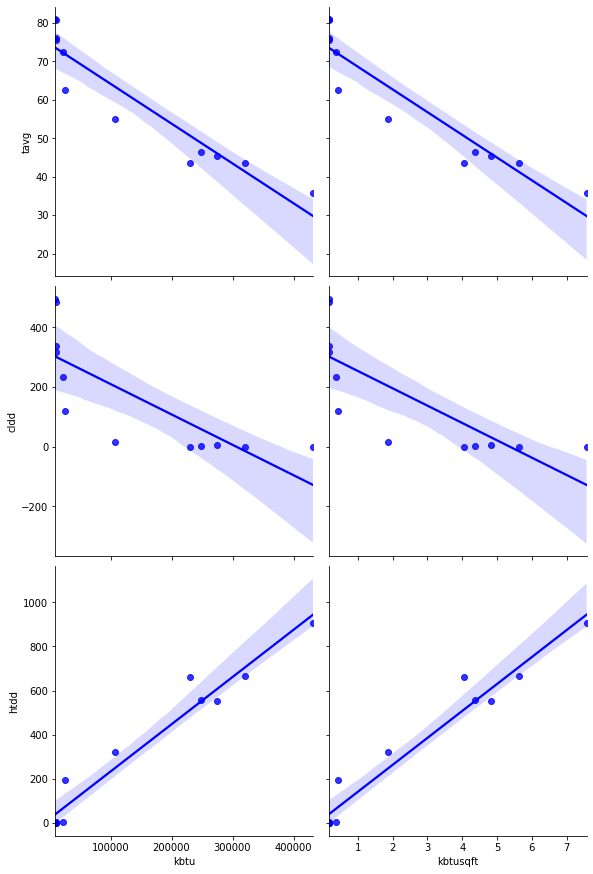

In [39]:
df6reg = sns.PairGrid(df6, y_vars=['tavg', 'cldd', 'htdd'], x_vars=['kbtu','kbtusqft'], height = 4)
df6reg.map(sns.regplot, color='blue')

In [40]:
query7='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, AVG(b.KBTU/b.TAXRECORDFLOORAREA) as kbtusqft, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.PID = 'PM9961605'
AND b.REPORTINGYEAR = 2019
AND b.ELEGAS = 'E'
AND b.TAXRECORDFLOORAREA > 0 
GROUP BY b.PID,b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD;
'''

In [41]:
df7=pd.read_sql(query7,conn)

In [42]:
df7.head()

,pid,reportingyear,month,elegas,kbtu,kbtusqft,tavg,cldd,htdd
0,PM9961605,2019,1,E,213094.1,3.733057,37.2,0.0,860.0
1,PM9961605,2019,2,E,188529.3,3.302722,42.2,0.0,637.0
2,PM9961605,2019,3,E,211460.5,3.704439,46.8,3.0,567.0
3,PM9961605,2019,4,E,217467.1,3.809665,62.3,53.0,133.0
4,PM9961605,2019,5,E,245544.4,4.301533,71.0,215.0,30.0


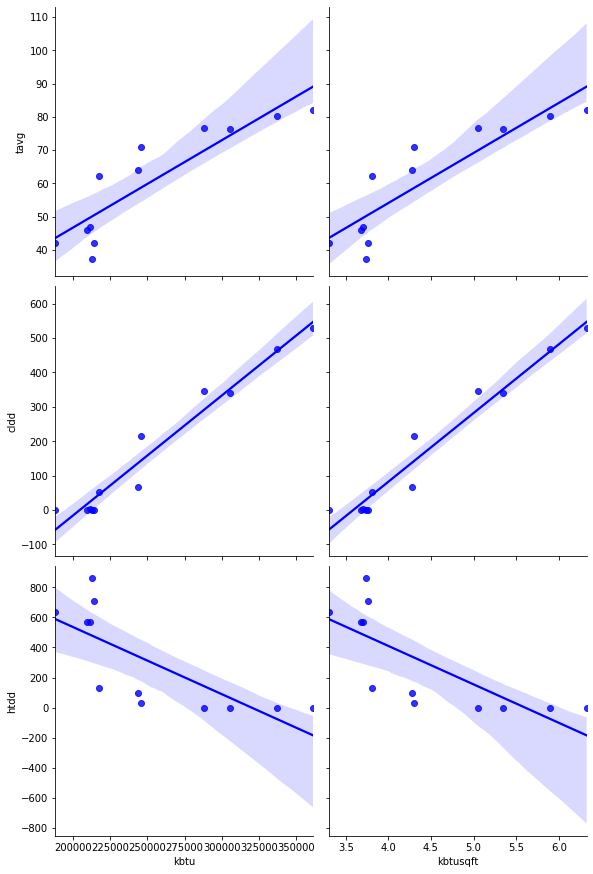

In [43]:
df7reg = sns.PairGrid(df7, y_vars=['tavg', 'cldd', 'htdd'], x_vars=['kbtu','kbtusqft'], height = 4)
df7reg.map(sns.regplot, color='blue')

In [44]:
query8='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, AVG(b.KBTU/b.TAXRECORDFLOORAREA) as kbtusqft, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.PID = 'PM9961605'
AND b.REPORTINGYEAR = 2019
AND b.ELEGAS = 'N'
AND b.TAXRECORDFLOORAREA > 0 
GROUP BY b.PID,b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD;
'''

In [45]:
df8=pd.read_sql(query8,conn)

In [46]:
df8.head()

,pid,reportingyear,month,elegas,kbtu,kbtusqft,tavg,cldd,htdd
0,PM9961605,2019,1,N,390373.2,6.838695,37.2,0.0,860.0
1,PM9961605,2019,2,N,367100.2,6.430990,42.2,0.0,637.0
2,PM9961605,2019,3,N,262871.8,4.605080,46.8,3.0,567.0
3,PM9961605,2019,4,N,64087.4,1.122706,62.3,53.0,133.0
4,PM9961605,2019,5,N,11270.7,0.197444,71.0,215.0,30.0


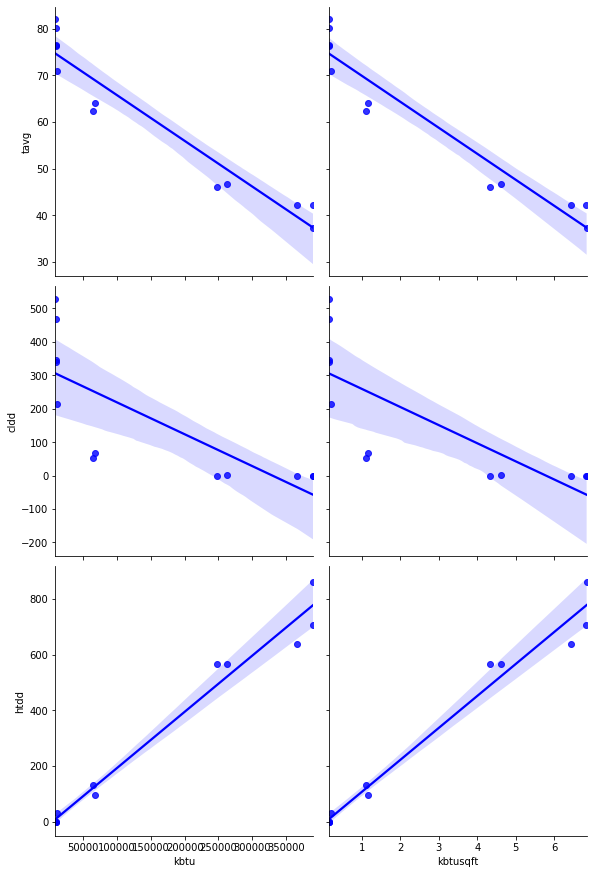

In [47]:
df8reg = sns.PairGrid(df8, y_vars=['tavg', 'cldd', 'htdd'], x_vars=['kbtu','kbtusqft'], height = 4)
df8reg.map(sns.regplot, color='blue')

In [48]:
# def make_lin_regression(xval,yval,dataframe,loc_var):
#     dataframe.loc[loc_var]
#     sns.regplot(x=xval,y=yval,data=df)

In [49]:
conn.close()
print('Closed')

Closed
